In [1]:
from nltk.tokenize import sent_tokenize
import unicodedata
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

### Loading and Cleaning

In [2]:
df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header = None)

In [3]:
plot_sum = pd.read_csv('MovieSummaries/plot_summaries.txt', sep='\t', header = None)

In [4]:
plot_sum

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."
...,...,...
42298,34808485,"The story is about Reema , a young Muslim schoolgirl in Malabar, who loved Malayalam and poetry. The film is about her mental trauma once she was moved to an English medium school by her parents, for their social status."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev looks through photographs for actors for his next movie. When he comes to the picture of an aged Sergius Alexander , he pauses, then tells his assistant to cast the man. Sergius shows up at the Eureka Studio with a horde of other extras and is issued a ..."
42300,35102018,"American Luthier focuses on Randy Parsons’ transformation from aspiring musician to guitar-maker. The guitar had been Parsons’ identity since he was a child, but after studying classical and jazz guitar in college, he realized that he would never make a living as a musician. So he gave it up — h..."
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit seller from Afghanistan, comes to Calcutta to hawk his merchandise and befriends a small Bengali girl called Mini who reminds him of his own daughter Amina back in Afghanistan. He puts up at a boarding house along with his countrymen. Since he is shor..."


In [5]:
titles = pd.read_csv('MovieSummaries/name.clusters.txt', sep = '\t', header = None)

In [6]:
df.iloc[1][8]

'{"/m/02n4kr": "Mystery", "/m/03bxz7": "Biographical film", "/m/07s9rl0": "Drama", "/m/0hj3n01": "Crime Drama"}'

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       81741 non-null  int64  
 1   1       81741 non-null  object 
 2   2       81741 non-null  object 
 3   3       74839 non-null  object 
 4   4       8401 non-null   float64
 5   5       61291 non-null  float64
 6   6       81741 non-null  object 
 7   7       81741 non-null  object 
 8   8       81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [9]:
df.max()

0        37501922
1        /m/0yzvw
2         春田花花同學會
4    2782275172.0
5       1079281.0
6              {}
7              {}
8              {}
dtype: object

In [10]:
df.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [11]:
plots = []

with open("MovieSummaries/plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

42303it [00:01, 41041.23it/s]


In [12]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

100%|██████████| 42303/42303 [00:00<00:00, 1619005.25it/s]


In [13]:
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  42303 non-null  object
 1   plot      42303 non-null  object
dtypes: object(2)
memory usage: 661.1+ KB


In [15]:
df['movie_id'] = df['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, df[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [16]:
type(json.loads(movies['genre'][0]))

dict

In [17]:
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

In [18]:
movies

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"
...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim schoolgirl in Malabar, who loved Malayalam and poetry. The film is about her mental trauma once she was moved to an English medium school by her parents, for their social status.",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev looks through photographs for actors for his next movie. When he comes to the picture of an aged Sergius Alexander , he pauses, then tells his assistant to cast the man. Sergius shows up at the Eureka Studio with a horde of other extras and is issued a ...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indie"", ""/m/01g6gs"": ""Black-and-white"", ""/m/04xvlr"": ""Period piece"", ""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film"", ""/m/03mqtr"": ""Political drama""}","[Silent film, Indie, Black-and-white, Period piece, Drama, War film, Political drama]"
42201,35102018,"American Luthier focuses on Randy Parsons’ transformation from aspiring musician to guitar-maker. The guitar had been Parsons’ identity since he was a child, but after studying classical and jazz guitar in college, he realized that he would never make a living as a musician. So he gave it up — h...",Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music"", ""/m/03bxz7"": ""Biographical film"", ""/m/0jtdp"": ""Documentary""}","[Short Film, Music, Biographical film, Documentary]"
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit seller from Afghanistan, comes to Calcutta to hawk his merchandise and befriends a small Bengali girl called Mini who reminds him of his own d

In [19]:
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [20]:
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

In [21]:
all_genres = sum(genres,[])
len(set(all_genres))

363

In [22]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [59]:
all_genres_df.info

<bound method DataFrame.info of                     Genre  Count
0                   Drama  19134
1            World cinema   5153
2        Action/Adventure   3553
3         Science Fiction   2339
4                  Action   5868
..                    ...    ...
358        Statutory rape      1
359  Silhouette animation      1
360     Children's Issues      1
361         Homoeroticism      1
362            Neorealism      1

[363 rows x 2 columns]>

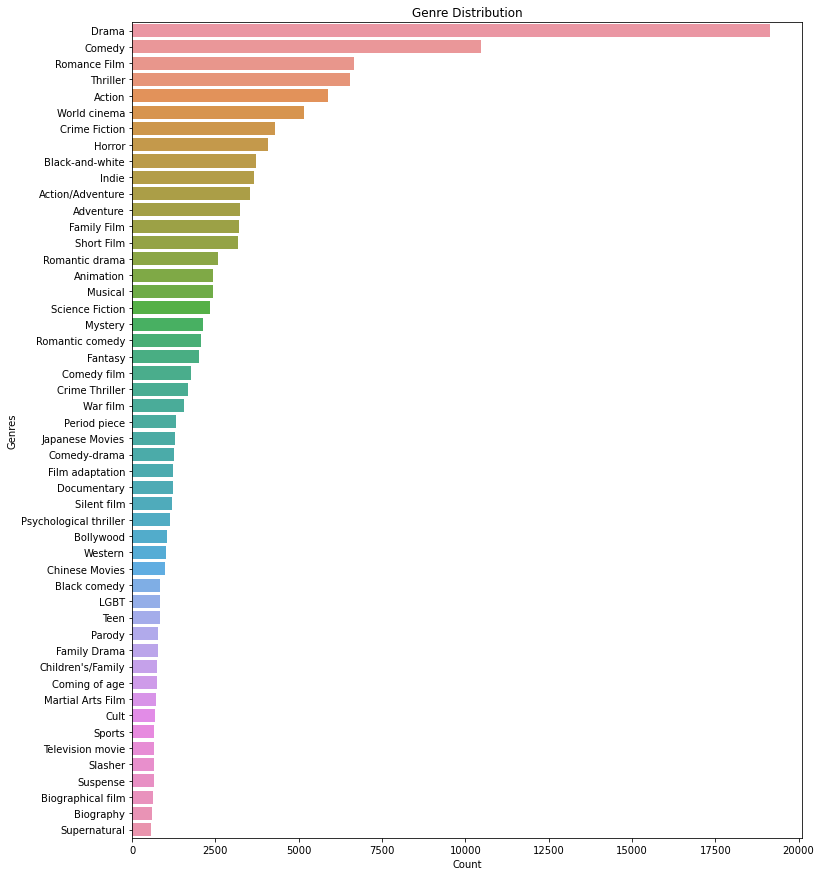

In [23]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count')
ax.set_title('Genre Distribution')
ax.set_ylabel('Genres')
plt.savefig('genres') 
plt.show()

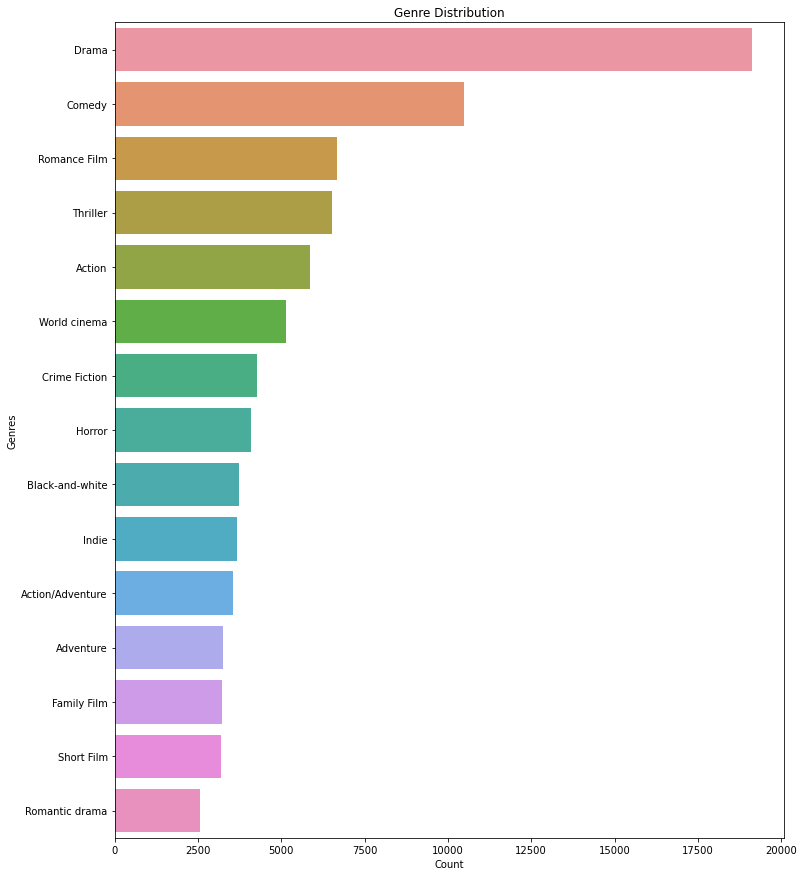

In [24]:
g = all_genres_df.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count')
ax.set_title('Genre Distribution')
ax.set_ylabel('Genres')
plt.savefig('genres_larger') 
plt.show()

### NLP

In [25]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [26]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))

<ipython-input-26-cba7721b10bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))


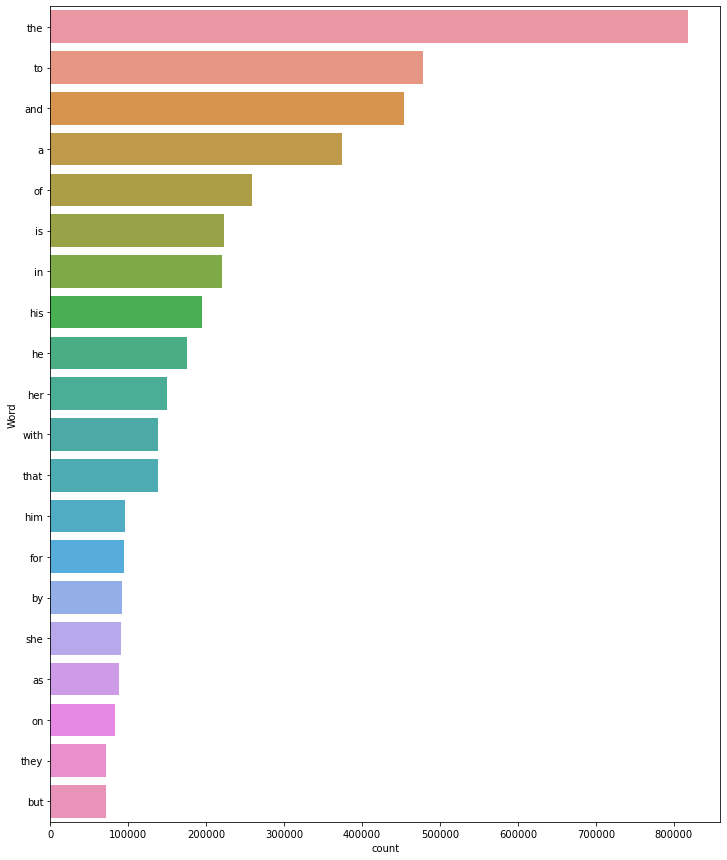

In [27]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

freq_words(movies_new['clean_plot'], 20)

In [28]:
#remove accents
# def remove_accents(input_str):
#      nfkd_form = unicodedata.normalize('NFKD', input_str)
#      only_ascii = nfkd_form.encode('ASCII', 'ignore')
#      return only_ascii.decode()

# movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_accents(x))

In [29]:
#stopwords
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stopwords_]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))


<ipython-input-29-115d56c37fea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))


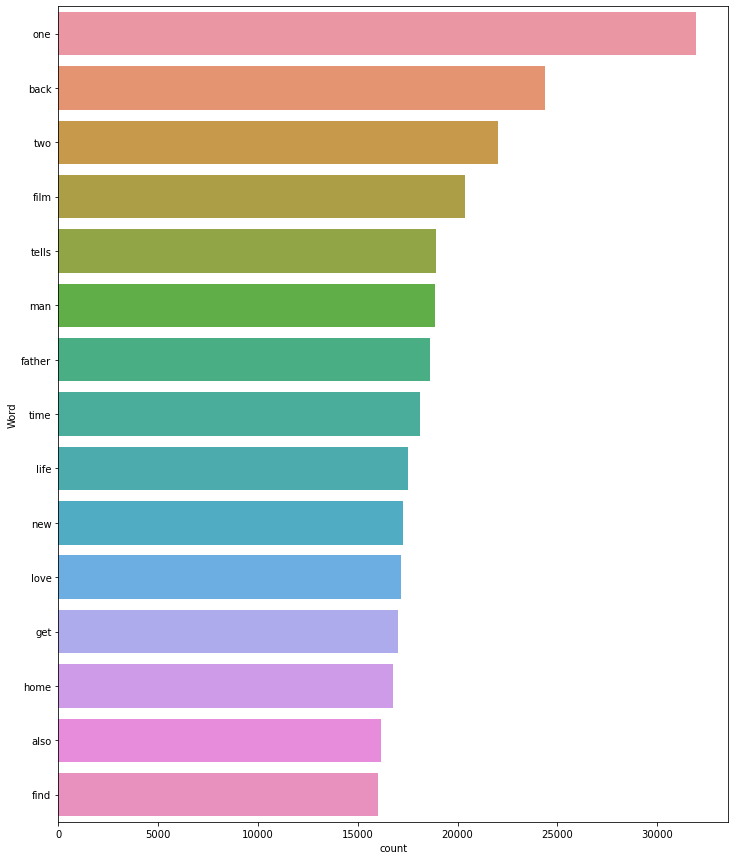

<Figure size 432x288 with 0 Axes>

In [30]:
freq_words(movies_new['clean_plot'], 15)
ax.set_ylabel = ('Words')
ax.set_title('15 Most Popular Words')
ax.set_xlabel('Count')
plt.savefig('top_15_words') 

In [31]:
#tokenize
#movies_new['clean_plot'] = movies_new.apply(lambda row: nltk.word_tokenize(row['clean_plot']), axis=1)

In [32]:
#stemming - tfidf not working with this because clean_plot becomes a list

#stemmer = SnowballStemmer("english")
#movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: [stemmer.stem(y) for y in x])

In [33]:
#lemmatization - did not work, separated all the letters

#lemmatizer = WordNetLemmatizer()
#movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

#### part of speech tagging

In [45]:
#sent_tags = list(map(pos_tag, movies_new.clean_plot))

In [ ]:
#plots = movies_new.clean_plot

### train test split and tf idf

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(movies_new['clean_plot'], y, test_size = .2, random_state = 5)

In [81]:
xtrain.shape

(33434,)

In [82]:
xtest.shape

(8359,)

In [83]:
ytrain.shape

(33434, 363)

In [84]:
ytest.shape

(8359, 363)

In [38]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


# Performance metric
from sklearn.metrics import f1_score
lr = LogisticRegression(max_iter=4000)
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)

y_pred = clf.predict(xtest_tfidf)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 52 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


In [42]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
multilabel_binarizer.inverse_transform(y_pred)[50]

()

In [46]:
f1_score(ytest, y_pred, average="micro")

0.31421241662390975

In [68]:
y_pred_prob = clf.predict_proba(xtest_tfidf)
t = 0.1 
# threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [69]:
f1_score(ytest, y_pred_new, average="micro")

0.4353733596562536

### cross validation

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=1000,ngram_range=[1,2])
text_vectors = cv.fit_transform(xtrain)
cvdf = pd.DataFrame(text_vectors.toarray(), columns=cv.get_feature_names())

In [73]:
cvdf.head()

,abandoned,able,accept,accepts,accident,accidentally,across,act,action,actually,...,year,year old,years,years later,yet,york,young,young man,young woman,younger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
nb = MultinomialNB()
scores = cross_val_score(nb, text_vectors, x, cv=10)
scores.mean()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 612, in fit
    X, y = self._check_X_y(X, y)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 477, in _check_X_y
    return self._validate_data(X, y, accept_sparse='csr')
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 612, in fit
    X, y = self._check_X_y(X, y)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 477, in _check_X_y
    return self._validate_data(X, y, accept_sparse='csr')
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f

nan